# Exploratory analysis for the light RNAseq data

In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn.cluster import KMeans
import matplotlib.colors as colors
import matplotlib.cm as cmx
from scipy import interpolate
from matplotlib.backends.backend_pdf import PdfPages
from mpl_toolkits.mplot3d import Axes3D
import sys
from pylab import *
import seaborn as sns
from sklearn.preprocessing import scale

ImportError: No module named pandas

In [6]:
#Read the voom processed data
b=0
batch=["batch1.csv","batch2.csv","combined.csv"]
data=pd.read_csv(batch[b])

NameError: name 'pd' is not defined

In [3]:
#Read the treatment annotations
batch_ds=["design_b1.csv","design_b2.csv","design_combined.csv"]
design=pd.read_csv(batch_ds[b])
design_dic=design.to_dict()
day=list(design['Inventory.Sample.Name'])
dia=[day[i].split('_')[1] for i in range(len(day)) ]
design['Dia']=dia

In [75]:
# Plot Two principal components
X = data.iloc[:,1:].values #Corrected expression values
X=np.transpose(X)
factors=['Treatment.Group.Name','Primary.Tissue','Dia']
y=design[factors[2]]
pca = decomposition.PCA()
X_r = pca.fit_transform(X)
# Create 3 different clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_r)
# Get the cluster centroids
centers = kmeans.cluster_centers_
conditions=unique(y)

<IPython.core.display.Javascript object>


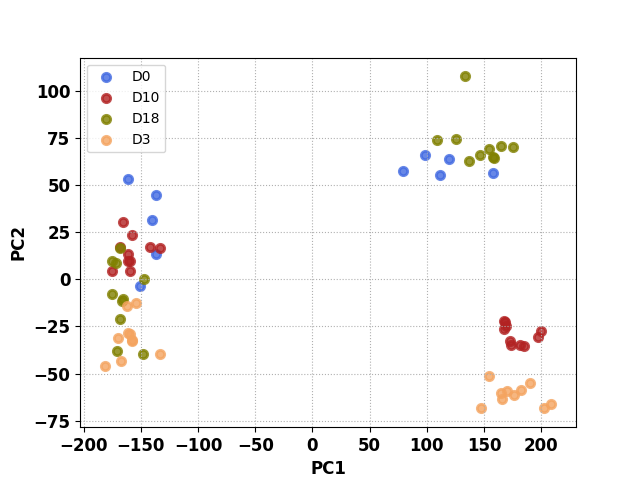

In [5]:
%matplotlib notebook
ig, ax = plt.subplots()
colors = ['royalblue','firebrick', 'olive', 'sandybrown']
lw = 2
for color, i, conditions in zip(colors, conditions, conditions):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=conditions)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.grid(linestyle='dotted')
ax.set_xlabel('PC1',fontsize=12, fontweight='bold')
ax.set_ylabel('PC2',fontsize=12, fontweight='bold')
fontsize = 12
ax = gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
     tick.label1.set_fontsize(fontsize)
     tick.label1.set_fontweight('bold')
    
pp = PdfPages('pc_day.pdf')
plt.savefig(pp,format='pdf')
pp.close()

In [8]:
#Inspect each PC and look at the top genes, cluster them and inspect treatmen
loadings = np.absolute(pca.components_)
percent=int(floor(0.9*len(loadings[1])))
order=np.argsort(loadings[1])
pc1=data.loc[order[percent:len(loadings[1])],:]
colors1 = ['royalblue', 'sandybrown', 'firebrick','olive']
factors=['Treatment.Group.Name','Primary.Tissue','Dia']

y=design[factors[2]]
lut = dict(zip(y.unique(), colors1))
colors=y.map(lut)
pc1_vals=pc1.set_index('Unnamed: 0') # Set index to have numeric values only
all_vals=data.set_index('Unnamed: 0')

<IPython.core.display.Javascript object>


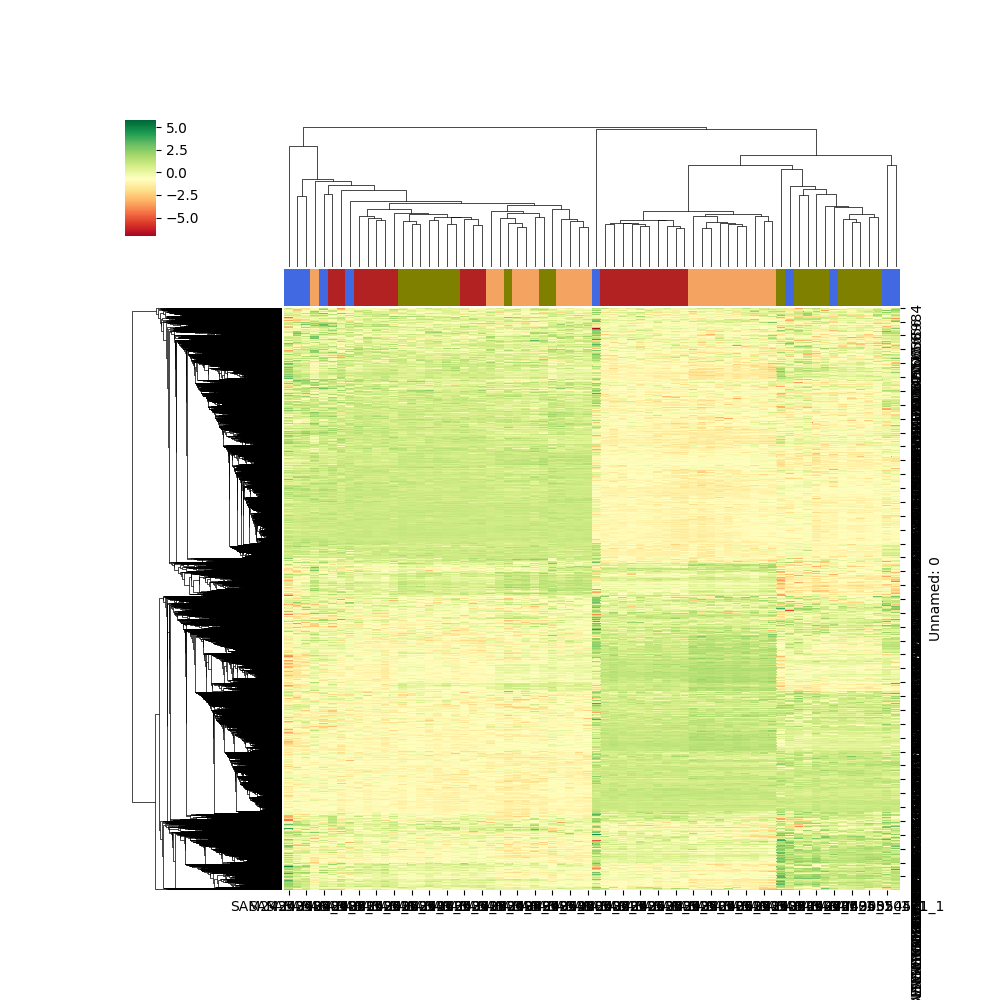

In [9]:
%matplotlib notebook
sns.clustermap(all_vals,cmap="RdYlGn",col_colors=colors.values,z_score=0)    
pp = PdfPages('cluster_time.pdf')
plt.savefig(pp,format='pdf')
pp.close()


{'D0': 'royalblue', 'D10': 'firebrick', 'D18': 'olive', 'D3': 'sandybrown'}

## Results
Both batches are consisten in their qualitative features but, nevertheless, there are batch effects. It seems that the most important factor in explaining the gene expression variability accross samples is the tissue, correctly discriminated by the first principal component. The second principal component still carries information about the tissue type but also some temporal information. With regard to the treatment, there is no apparent signal indicating that it affects the gene expression dynamics. Given the dominant effect of the tissue origin we will keep them separate.

# Subset by tissue type

## Lymph Node

<IPython.core.display.Javascript object>


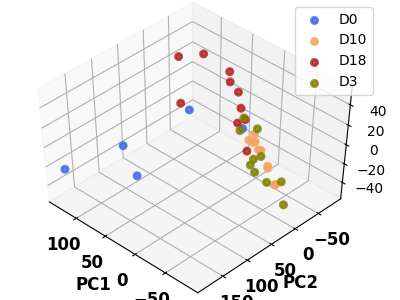

In [76]:
%matplotlib notebook

tissue=design[factors[1]]
X_l=X[tissue=='Lymph Node']

factors=['Treatment.Group.Name','Primary.Tissue','Dia']
y=design[factors[2]]
y=y[tissue=='Lymph Node']

pca = decomposition.PCA()
X_r = pca.fit_transform(X_l)
# Create 3 different clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_r)
# Get the cluster centroids
centers = kmeans.cluster_centers_
conditions=unique(y)


fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax2 = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
colors = ['royalblue', 'sandybrown', 'firebrick','olive']
lw = 2
for color, i, conditions in zip(colors, conditions, conditions):
    ax2.scatter(X_r[y == i, 0], X_r[y == i, 1],X_r[y == i, 2], color=color, alpha=.8, lw=lw,
                label=conditions)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.grid(linestyle='dotted')
ax2.set_xlabel('PC1',fontsize=12, fontweight='bold')
ax2.set_ylabel('PC2',fontsize=12, fontweight='bold')
fontsize = 12
ax2 = gca()
for tick in ax2.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax2.yaxis.get_major_ticks():
     tick.label1.set_fontsize(fontsize)
     tick.label1.set_fontweight('bold')

In [77]:
%matplotlib notebook
#Inspect each PC and look at the top genes, cluster them and inspect treatmen
loadings = np.absolute(pca.components_)
percent=int(floor(0.8*len(loadings[0])))
order=np.argsort(loadings[0])
#Subset the data
t=tissue=='Lymph Node'
lymphs=[i for i, x in enumerate(t) if x]
#pc1.to_csv("pc1_Tumor.csv")
data.pop('Unnamed: 0')
data_lymph=data.iloc[:,lymphs]
design_lymph=design.iloc[lymphs,:]


<IPython.core.display.Javascript object>


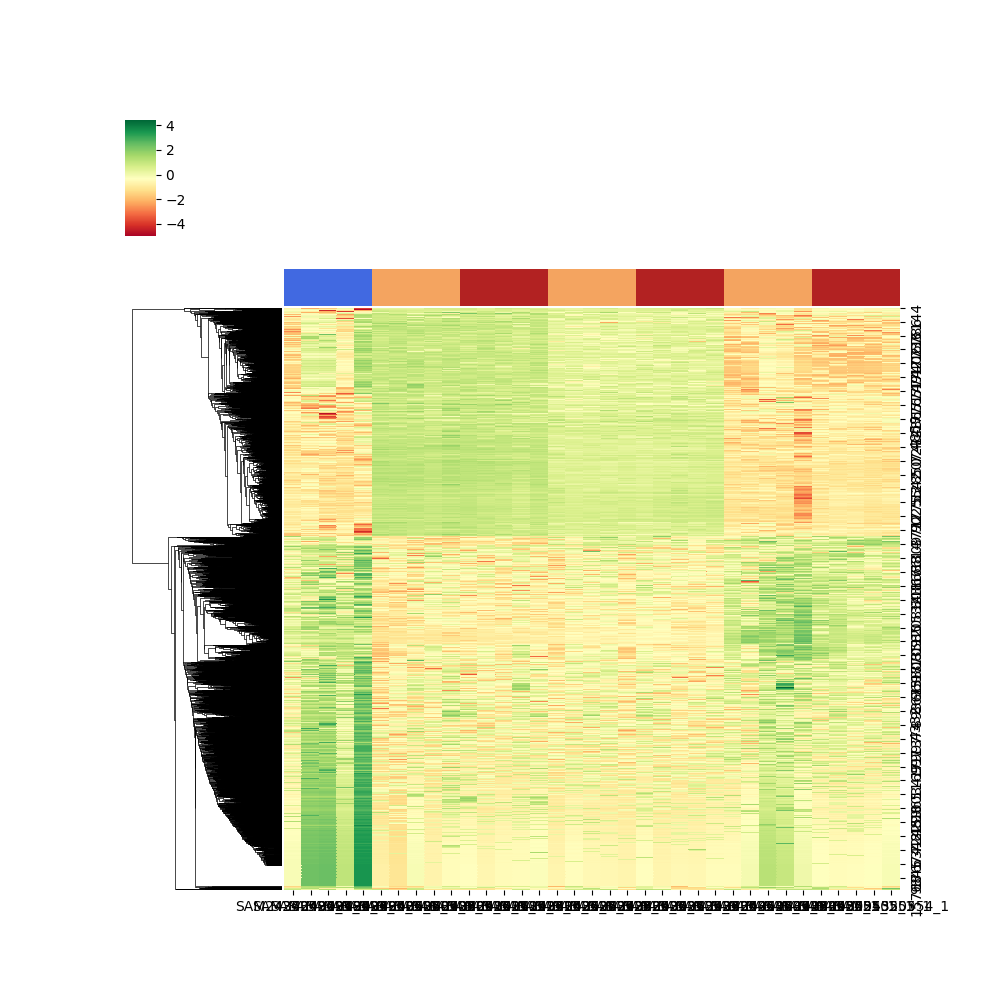

In [78]:
#Subset the genes
pc1=data_lymph.loc[order[percent:len(loadings[0])],:]
colors1 = ['royalblue', 'sandybrown', 'firebrick','olive']
factors=['Treatment.Group.Name','Primary.Tissue','Dia']
y=design_lymph[factors[0]]
y=y.reset_index(drop=True)
lut = dict(zip(y.unique(), colors1))
colors2=y.map(lut)
sns.clustermap(pc1,cmap="RdYlGn",col_colors=colors2.values,col_cluster=False,z_score=0)

#pp = PdfPages('cluster_pc1_tumor_time.pdf')
#plt.savefig(pp,format='pdf')
#pp.close()

In [64]:
y

0      D0
1      D0
2      D0
3      D0
4      D0
5      D3
6      D3
7      D3
8      D3
9      D3
10     D3
11     D3
12     D3
13     D3
14     D3
15    D10
16    D10
17    D10
18    D10
19    D10
20    D10
21    D10
22    D10
23    D10
24    D10
25    D18
26    D18
27    D18
28    D18
29    D18
30    D18
31    D18
32    D18
33    D18
34    D18
Name: Dia, dtype: object

In [44]:
colors2.values

array(['royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue',
       'sandybrown', 'sandybrown', 'sandybrown', 'sandybrown',
       'sandybrown', 'firebrick', 'firebrick', 'firebrick', 'firebrick',
       'firebrick', 'sandybrown', 'sandybrown', 'sandybrown', 'sandybrown',
       'sandybrown', 'firebrick', 'firebrick', 'firebrick', 'firebrick',
       'firebrick', 'sandybrown', 'sandybrown', 'sandybrown', 'sandybrown',
       'sandybrown', 'firebrick', 'firebrick', 'firebrick', 'firebrick',
       'firebrick'], dtype=object)

In [63]:
X

array([[ 7.68572029,  3.6836922 ,  4.88472087, ..., -3.01211607,
        -3.01211607, -4.59707857],
       [ 7.16967837,  4.97763776,  4.93843168, ..., -4.05082088,
        -0.94648422, -6.37274898],
       [ 7.68861045,  3.92879578,  3.40342208, ..., -2.44624365,
        -2.44624365, -4.03120615],
       ..., 
       [ 7.69322734,  4.59554246,  0.06637417, ..., -5.99971502,
         3.35563608, -0.9553209 ],
       [ 7.69842302,  4.75966527, -2.17016214, ..., -5.87060185,
         3.33641247, -0.51304985],
       [ 7.705679  ,  5.13800475, -2.78000658, ..., -5.5873615 ,
         3.04563369, -1.33943399]])